In [1]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Setting toolkit folder as working directory

%cd /content/drive/My Drive/Project/ML project/ML 05 TF
! ls

/content/drive/My Drive/Project/ML project/ML 05 TF
Song.csv		      Suicide_Detection.csv  twitter_data.csv
suicidal-tendency-tweets.csv  TF03.ipynb
suicidal-tendency-users.csv   TF04.ipynb


In [3]:
from flask import Flask, render_template, url_for
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score
import re

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [4]:
data = pd.read_csv("Suicide_Detection.csv")
data

,user_id,tweet,sentiment
0,180,Am I weird I don't get affected by compliments...,non-suicide
1,91,Finally 2020 is almost over... So I can never ...,non-suicide
2,169,i need helpjust help me im crying so hard,suicide
3,56,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
4,57,Honetly idkI dont know what im even doing here...,suicide
...,...,...,...
232039,57,If you don't like rock then your not going to ...,non-suicide
232040,213,You how you can tell i have so many friends an...,non-suicide
232041,196,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232042,156,The usual stuff you find hereI'm not posting t...,suicide


suicide        116032
non-suicide    116012
Name: sentiment, dtype: int64


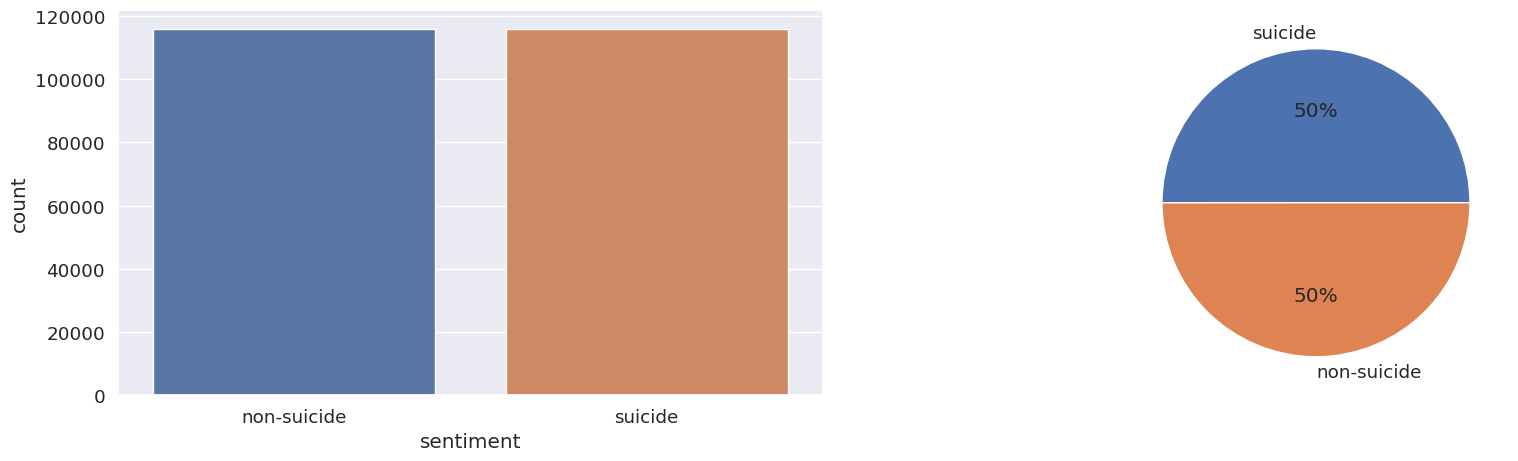

In [7]:
classCnt = data['sentiment'].value_counts()
print(classCnt)

plt.figure(figsize=((20,5)))

plt.subplot(1,2,1)
sns.countplot(data,x='sentiment')

plt.subplot(1,2,2)
plt.pie(classCnt,labels = classCnt.index,autopct='%.0f%%')

plt.show()

In [8]:
data.isnull().sum()


user_id      0
tweet        0
sentiment    0
dtype: int64

In [9]:
data.duplicated().sum()


0

suicide        116032
non-suicide    116012
Name: sentiment, dtype: int64


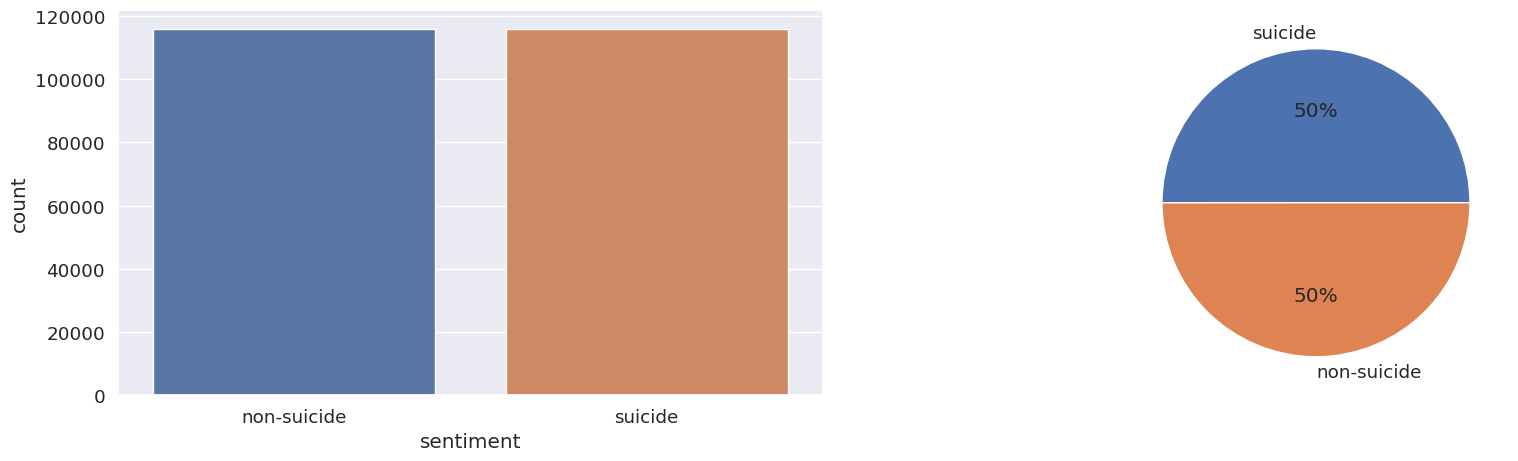

In [10]:
classCnt = data['sentiment'].value_counts()
print(classCnt)

plt.figure(figsize=((20,5)))

plt.subplot(1,2,1)
sns.countplot(data,x='sentiment')

plt.subplot(1,2,2)
plt.pie(classCnt,labels = classCnt.index,autopct='%.0f%%')

plt.show()

In [ ]:
# data['word_count'] = data['tweet'].str.split().map(len)

In [ ]:
# data['number_of_words'] = data.tweet.apply(lambda x: len(x.split()))

# Data Preprocessing 

In [ ]:
data['tweet'][1]

'Finally 2020 is almost over... So I can never hear "2020 has been a bad year" ever again. I swear to fucking God it\'s so annoying'

In [ ]:
import nltk 
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['tweet']=data['tweet'].apply(str)
data['tweet'] = data['tweet'].str.lower()
data['tweet'] = data['tweet'].apply(lambda i : re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+','', i))
data['tweet'] = data['tweet'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
data['tweet'] = data['tweet'].apply(lambda x : " ".join(t for t in x.split() if t not in stop_words))

In [ ]:
data['tweet'][1]

'finally 2020 almost never hear 2020 bad year ever swear fucking god annoying'

# Train Test Split

In [ ]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(data['tweet'], data['sentiment'], test_size = 0.1, random_state = 0)

In [ ]:
df_train = pd.DataFrame()
df_train['tweet'] = train_X
df_train['sentiment'] = train_Y

df_test = pd.DataFrame()
df_test['tweet'] = test_X
df_test['sentiment'] = test_Y

In [ ]:
df_train

,tweet,sentiment
170406,fuck bro make difficult phone call call costum...,non-suicide
180043,think im gonna itso dad told im shit im never ...,suicide
88594,subreddit isnt letting post image meme reason ...,non-suicide
116373,hello therei really didnt wanted write really ...,suicide
123819,noose snappedi hung today reaching family told...,suicide
...,...,...
176963,twitter got locked changing date viable date b...,non-suicide
117952,im tired tired bullshit end ahahahahahahahhh s...,non-suicide
173685,go hospital suicidal thoughtslately im thinkin...,suicide
43567,friend genuinely depressed wanting attentionso...,suicide


In [ ]:
df_test

,tweet,sentiment
71684,saying goodbye havent active much ive enjoyed ...,non-suicide
115586,day 65 posting something everyday get girlfrie...,non-suicide
116809,need war brownie corner pieces vs brownie midd...,non-suicide
4154,stop right fellow teen want use right comments...,non-suicide
141038,ok sooo im sittin parkin lot rn tryna get dis ...,non-suicide
...,...,...
69968,subreddit disappointmentsuicide watch like wat...,suicide
13984,want endi feel little every day feels like str...,suicide
3573,sub chaotically boring middle night dude keeps...,non-suicide
72850,birthday 18 years old,non-suicide


# TF-TDF feature extraction

In [ ]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features = 500)
tfidf_vect.fit(data['tweet'])
train_X_tfidf = tfidf_vect.transform(df_train['tweet'])
test_X_tfidf = tfidf_vect.transform(df_test['tweet'])

In [ ]:
tfidf_vect

TfidfVectorizer(max_features=500)

In [ ]:
print(train_X_tfidf)

  (0, 408)	0.2657170638188682
  (0, 399)	0.20548138754235717
  (0, 387)	0.17404623868396543
  (0, 373)	0.18766518708974764
  (0, 321)	0.2691277944089513
  (0, 265)	0.16697518132890263
  (0, 217)	0.2514699304241516
  (0, 160)	0.13234679460011617
  (0, 151)	0.20576848134637715
  (0, 136)	0.19902615607799917
  (0, 56)	0.7249092523995418
  (0, 16)	0.18207894424875282
  (1, 497)	0.10394114466006658
  (1, 495)	0.07402723324715421
  (1, 488)	0.06601889527313573
  (1, 479)	0.2703925067448838
  (1, 468)	0.15032147376156024
  (1, 466)	0.10147615500349819
  (1, 462)	0.16295906156382944
  (1, 442)	0.17641596910602542
  (1, 438)	0.09476882562197456
  (1, 431)	0.06570901118389141
  (1, 419)	0.11061600451331235
  (1, 412)	0.08164523083155197
  (1, 408)	0.2334921738240948
  :	:
  (208838, 88)	0.09001506669033782
  (208838, 80)	0.17502623434990425
  (208838, 79)	0.12812787007255827
  (208838, 75)	0.04608901688026519
  (208838, 72)	0.11866841161261381
  (208838, 70)	0.04312524752843998
  (208838, 58)	0.

In [ ]:
print(test_X_tfidf)

  (0, 357)	0.3156935326516911
  (0, 316)	0.31917130839148594
  (0, 290)	0.41846644133547833
  (0, 226)	0.2593278246757544
  (0, 224)	0.18686263216542312
  (0, 219)	0.1282868600806409
  (0, 192)	0.29356438339561114
  (0, 173)	0.4479815656216955
  (0, 89)	0.2772045213449934
  (0, 2)	0.3755224992033986
  (1, 462)	0.17178079741839244
  (1, 387)	0.24182705349608113
  (1, 336)	0.392659093264266
  (1, 330)	0.37681283228406154
  (1, 219)	0.1345715446128879
  (1, 164)	0.34364897964252217
  (1, 160)	0.18388811858159232
  (1, 120)	0.3584737534457199
  (1, 88)	0.227117954526267
  (1, 47)	0.3953631458489287
  (1, 27)	0.33079447317195365
  (2, 293)	1.0
  (3, 462)	0.1528595327970957
  (3, 456)	0.31125403368620935
  (3, 399)	0.25405669568398553
  :	:
  (23201, 432)	0.22081744551549984
  (23201, 250)	0.2277118913745044
  (23201, 247)	0.23988398130651378
  (23201, 230)	0.18975278520194494
  (23201, 226)	0.2062572460390241
  (23201, 196)	0.2818581782553378
  (23201, 160)	0.2788513176838753
  (23201, 138)

In [ ]:
print(train_X_tfidf.shape)
print(test_X_tfidf.shape)

(208839, 500)
(23205, 500)


In [ ]:
print(tfidf_vect.vocabulary_)


{'weird': 471, 'dont': 103, 'get': 160, 'coming': 74, 'someone': 386, 'know': 236, 'feel': 135, 'really': 343, 'good': 173, 'finally': 142, 'almost': 12, 'never': 295, 'hear': 195, 'bad': 35, 'year': 494, 'ever': 118, 'fucking': 153, 'god': 168, 'need': 293, 'help': 198, 'im': 219, 'crying': 84, 'hard': 190, 'name': 292, 'ive': 224, 'years': 495, 'afraid': 8, 'past': 317, 'thoughts': 435, 'suicide': 407, 'fear': 134, 'anxiety': 20, 'close': 70, 'long': 255, 'scared': 359, 'come': 72, 'family': 130, 'feelings': 137, 'ago': 10, 'everyday': 120, 'feeling': 136, 'lost': 260, 'things': 430, 'done': 102, 'like': 247, 'little': 250, 'life': 246, 'time': 437, 'broke': 52, 'saw': 355, 'something': 387, 'day': 88, 'made': 264, 'absolutely': 5, 'later': 240, 'found': 147, 'attempt': 31, 'pills': 322, 'happened': 186, 'went': 473, 'still': 398, 'first': 145, 'therapy': 426, 'depression': 95, 'social': 385, 'group': 178, 'reason': 344, 'eventually': 117, 'last': 239, 'find': 143, 'horrible': 207, '

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
RF_model.fit(train_X_tfidf,train_Y)

RandomForestClassifier()

In [ ]:
predictions_RF = RF_model.predict(test_X_tfidf)
test_RF_prediction = pd.DataFrame()
test_RF_prediction['Sentiment'] = test_X
test_RF_prediction['Label'] = predictions_RF
RF_accuracy = accuracy_score(predictions_RF, test_Y)*100
RF_accuracy = round(RF_accuracy,1)

In [ ]:
test_RF_prediction

,Sentiment,Label
71684,saying goodbye havent active much ive enjoyed ...,non-suicide
115586,day 65 posting something everyday get girlfrie...,non-suicide
116809,need war brownie corner pieces vs brownie midd...,non-suicide
4154,stop right fellow teen want use right comments...,non-suicide
141038,ok sooo im sittin parkin lot rn tryna get dis ...,non-suicide
...,...,...
69968,subreddit disappointmentsuicide watch like wat...,suicide
13984,want endi feel little every day feels like str...,suicide
3573,sub chaotically boring middle night dude keeps...,non-suicide
72850,birthday 18 years old,non-suicide


In [ ]:
RF_accuracy

89.5

In [ ]:
# Accuracy, Precision, Recall, f1-score

print ("\nHere is the classification report:") 
print (classification_report(test_Y, predictions_RF))


Here is the classification report:
              precision    recall  f1-score   support

 non-suicide       0.90      0.89      0.90     11649
     suicide       0.89      0.90      0.90     11556

    accuracy                           0.90     23205
   macro avg       0.90      0.90      0.90     23205
weighted avg       0.90      0.90      0.90     23205



In [ ]:
# from collections import Counter
# # Counter(y_true) # y_true must be your labels

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


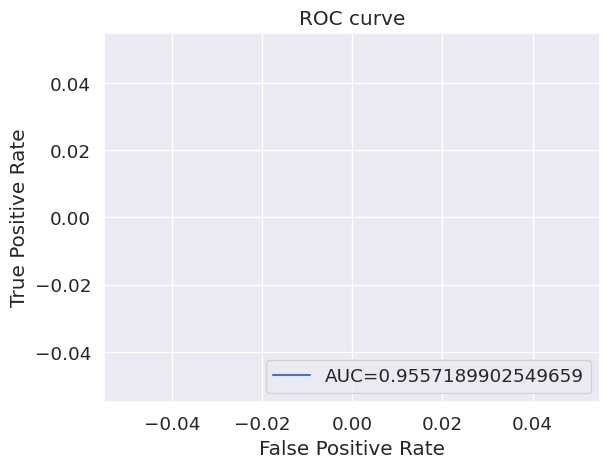

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred_proba = RF_model.predict_proba(test_X_tfidf)[::,1]
fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba, pos_label=1)
auc = metrics.roc_auc_score(test_Y, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.legend(loc=4)

plt.show()

# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier()
DT_model.fit(train_X_tfidf,train_Y)

DecisionTreeClassifier()

In [ ]:
predictions_DT = DT_model.predict(test_X_tfidf)
test_DT_prediction = pd.DataFrame()
test_DT_prediction['Sentiment'] = test_X
test_DT_prediction['Label'] = predictions_DT
DT_accuracy = accuracy_score(predictions_DT, test_Y)*100
DT_accuracy = round(DT_accuracy,1)

In [ ]:
test_DT_prediction

,Sentiment,Label
71684,saying goodbye havent active much ive enjoyed ...,non-suicide
115586,day 65 posting something everyday get girlfrie...,non-suicide
116809,need war brownie corner pieces vs brownie midd...,non-suicide
4154,stop right fellow teen want use right comments...,non-suicide
141038,ok sooo im sittin parkin lot rn tryna get dis ...,non-suicide
...,...,...
69968,subreddit disappointmentsuicide watch like wat...,suicide
13984,want endi feel little every day feels like str...,suicide
3573,sub chaotically boring middle night dude keeps...,non-suicide
72850,birthday 18 years old,non-suicide


In [ ]:
DT_accuracy

83.7

In [ ]:
# Accuracy, Precision, Recall, f1-score

print ("\nHere is the classification report:") 
print (classification_report(test_Y, predictions_DT))


Here is the classification report:
              precision    recall  f1-score   support

 non-suicide       0.83      0.84      0.84     11649
     suicide       0.84      0.83      0.84     11556

    accuracy                           0.84     23205
   macro avg       0.84      0.84      0.84     23205
weighted avg       0.84      0.84      0.84     23205



#KNeighborsClassifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(train_X_tfidf,train_Y)

KNeighborsClassifier()

In [ ]:
predictions_knn = knn_model.predict(test_X_tfidf)
test_knn_prediction = pd.DataFrame()
test_knn_prediction['Sentiment'] = test_X
test_knn_prediction['Label'] = predictions_knn
knn_accuracy = accuracy_score(predictions_knn, test_Y)*100
knn_accuracy = round(knn_accuracy,1)

In [ ]:
test_knn_prediction

,Sentiment,Label
71684,saying goodbye havent active much ive enjoyed ...,non-suicide
115586,day 65 posting something everyday get girlfrie...,non-suicide
116809,need war brownie corner pieces vs brownie midd...,non-suicide
4154,stop right fellow teen want use right comments...,non-suicide
141038,ok sooo im sittin parkin lot rn tryna get dis ...,non-suicide
...,...,...
69968,subreddit disappointmentsuicide watch like wat...,non-suicide
13984,want endi feel little every day feels like str...,suicide
3573,sub chaotically boring middle night dude keeps...,non-suicide
72850,birthday 18 years old,non-suicide


In [ ]:
knn_accuracy

60.8

In [ ]:
# Accuracy, Precision, Recall, f1-score

print ("\nHere is the classification report:") 
print (classification_report(test_Y, predictions_knn))


Here is the classification report:
              precision    recall  f1-score   support

 non-suicide       0.56      0.97      0.71     11649
     suicide       0.88      0.25      0.39     11556

    accuracy                           0.61     23205
   macro avg       0.72      0.61      0.55     23205
weighted avg       0.72      0.61      0.55     23205



# Naive_bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(train_X_tfidf,train_Y)

MultinomialNB()

In [ ]:
predictions_nb = nb_model.predict(test_X_tfidf)
test_nb_prediction = pd.DataFrame()
test_nb_prediction['Sentiment'] = test_X
test_nb_prediction['Label'] = predictions_nb
nb_accuracy = accuracy_score(predictions_nb, test_Y)*100
nb_accuracy = round(nb_accuracy,1)

In [ ]:
test_nb_prediction

,Sentiment,Label
71684,saying goodbye havent active much ive enjoyed ...,non-suicide
115586,day 65 posting something everyday get girlfrie...,non-suicide
116809,need war brownie corner pieces vs brownie midd...,non-suicide
4154,stop right fellow teen want use right comments...,non-suicide
141038,ok sooo im sittin parkin lot rn tryna get dis ...,non-suicide
...,...,...
69968,subreddit disappointmentsuicide watch like wat...,non-suicide
13984,want endi feel little every day feels like str...,suicide
3573,sub chaotically boring middle night dude keeps...,non-suicide
72850,birthday 18 years old,non-suicide


In [ ]:
nb_accuracy

84.1

In [ ]:
# Accuracy, Precision, Recall, f1-score

print ("\nHere is the classification report:") 
print (classification_report(test_Y, predictions_nb))


Here is the classification report:
              precision    recall  f1-score   support

 non-suicide       0.90      0.77      0.83     11649
     suicide       0.80      0.91      0.85     11556

    accuracy                           0.84     23205
   macro avg       0.85      0.84      0.84     23205
weighted avg       0.85      0.84      0.84     23205



# SVM

In [ ]:
from sklearn.svm import SVC

# svm_model = SVC(kernel='linear')
svm_model = SVC()
svm_model.fit(train_X_tfidf,train_Y)

In [ ]:
# Proses Pengujian

from sklearn.metrics import accuracy_score

predictions_SVM = svm_model.predict(test_X_tfidf)
test_prediction = pd.DataFrame()
test_prediction['Sentiment'] = test_X
test_prediction['Label'] = predictions_SVM
SVM_accuracy = accuracy_score(predictions_SVM, test_Y)*100
SVM_accuracy = round(SVM_accuracy,1)

In [ ]:
test_prediction

In [ ]:
SVM_accuracy

In [ ]:
# Accuracy, Precision, Recall, f1-score

from sklearn.metrics import classification_report

print ("\nHere is the classification report:") 
print (classification_report(test_Y, predictions_SVM))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)